<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [3]:
# load dataset
from tensorflow.keras.datasets import cifar10

In [4]:
# unpack data
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [5]:
# instances, width, height, color channels
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

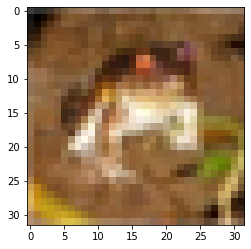

In [7]:
# FROAG IMAGE
plt.imshow(x_train[0]);

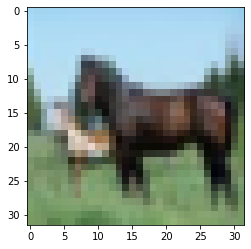

In [8]:
# HORSE IMAGE
plt.imshow(x_train[12]);

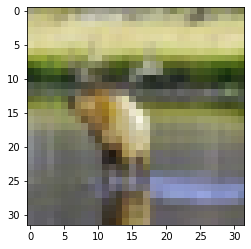

In [9]:
plt.imshow(x_train[89]);

# PreProcessing

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train[0].shape

(32, 32, 3)

In [12]:
# let's find out min and max for each image
x_train[0].min(), x_train[0].max()

(0, 255)

In [13]:
# Scaling
# as we know that max value is 255, we can scale it down between 0 and 1.
x_train = x_train / 255

In [14]:
x_test = x_test / 255

In [15]:
# recheck the min, max value after scaling.
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [16]:
x_train.shape

(50000, 32, 32, 3)

## Labels

+  As labels itself are in Integer, we can one hot encode those categorical values.
+ This will avoid Model from reading those numbers as continous values rather than categorical values.

In [17]:
y_train[0]

array([6], dtype=uint8)

In [21]:
y_train.shape

(50000, 1)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
# change to categorical
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [22]:
y_cat_train.shape

(50000, 10)

In [23]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

----------
# Building the Model

### Put the layers

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
x_train[0].shape

(32, 32, 3)

In [29]:
32*32*3

3072

In [32]:
model = Sequential()

# Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the layers
model.add(Flatten())

# Dense Layer
model.add(Dense(units=256, activation='relu'))

# Output Layer
model.add(Dense(units=10, activation='softmax'))

# Compile Layer
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

### Add Early Stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)

### Fit the model

In [38]:
model.fit(x_train, y_cat_train, 
          validation_data=(x_test, y_cat_test),
         epochs=15,
         callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 87s 53ms/step - loss: 1.5176 - accuracy: 0.4498 - val_loss: 1.3458 - val_accuracy: 0.5174
Epoch 2/15
1563/1563 [==============================] - 85s 55ms/step - loss: 1.2101 - accuracy: 0.5694 - val_loss: 1.1977 - val_accuracy: 0.5830
Epoch 3/15
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0757 - accuracy: 0.6227 - val_loss: 1.1086 - val_accuracy: 0.6152
Epoch 4/15
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9728 - accuracy: 0.6586 - val_loss: 1.0281 - val_accuracy: 0.6378
Epoch 5/15
1563/1563 [==============================] - 90s 58ms/step - loss: 0.8901 - accuracy: 0.6875 - val_loss: 0.9763 - val_accuracy: 0.6638
Epoch 6/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8150 - accuracy: 0.7134 - val_loss: 0.9911 - val_accuracy: 0.6616
Epoch 7/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7532 - accuracy: 0.7357 - val_loss: 1.0119 -

# Model Evaluation

In [41]:
metrics = pd.DataFrame(model.history.history)

In [42]:
metrics.head(2)

,loss,accuracy,val_loss,val_accuracy
0,1.517568,0.44984,1.345754,0.5174
1,1.210071,0.56940,1.197692,0.5830


In [43]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

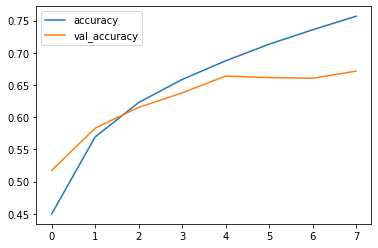

In [44]:
metrics[['accuracy', 'val_accuracy']].plot();

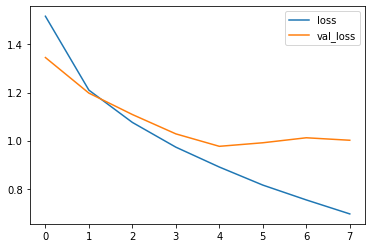

In [45]:
metrics[['loss','val_loss']].plot();

In [46]:
model.metrics_names

['loss', 'accuracy']

In [50]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[1.001538872718811, 0.6715999841690063]


#### Classification Report & Confusion Matrix

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [53]:
predictions

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.80      0.71      0.75      1000
           2       0.68      0.46      0.55      1000
           3       0.50      0.48      0.49      1000
           4       0.61      0.67      0.64      1000
           5       0.55      0.60      0.57      1000
           6       0.74      0.76      0.75      1000
           7       0.77      0.71      0.74      1000
           8       0.80      0.73      0.77      1000
           9       0.62      0.85      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [55]:
import seaborn as sns

In [56]:
confusion_matrix(y_test, predictions)

array([[748,  30,  29,  13,  30,  12,  11,  12,  56,  59],
       [ 28, 707,   2,   5,   5,   6,   7,   6,  19, 215],
       [ 80,  11, 456,  79, 121, 112,  71,  23,  13,  34],
       [ 20,  13,  41, 485,  81, 198,  66,  34,  24,  38],
       [ 18,   4,  44,  75, 667,  38,  53,  72,  18,  11],
       [ 14,   6,  29, 190,  53, 598,  34,  49,   9,  18],
       [  9,  16,  32,  52,  46,  39, 762,  10,   8,  26],
       [ 15,   5,  18,  46,  72,  70,   7, 711,   4,  52],
       [ 95,  46,  13,  14,  14,  11,   8,   1, 733,  65],
       [ 32,  47,   6,  12,   7,   6,   6,   6,  29, 849]], dtype=int64)

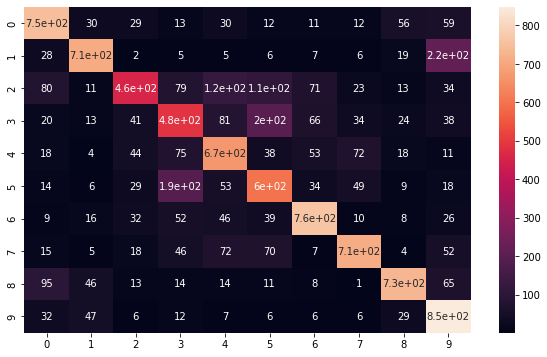

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

### Performance on Single Image

In [62]:
my_image = x_test[16]

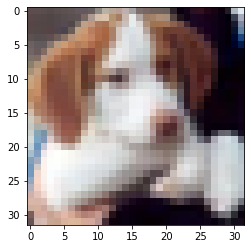

In [63]:
plt.imshow(my_image);

In [64]:
y_test[16]

array([5], dtype=uint8)

In [66]:
predictions = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)), axis=-1)
predictions

array([5], dtype=int64)

In [67]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html